In [12]:
import networkx as nx
import matplotlib.pyplot as plt


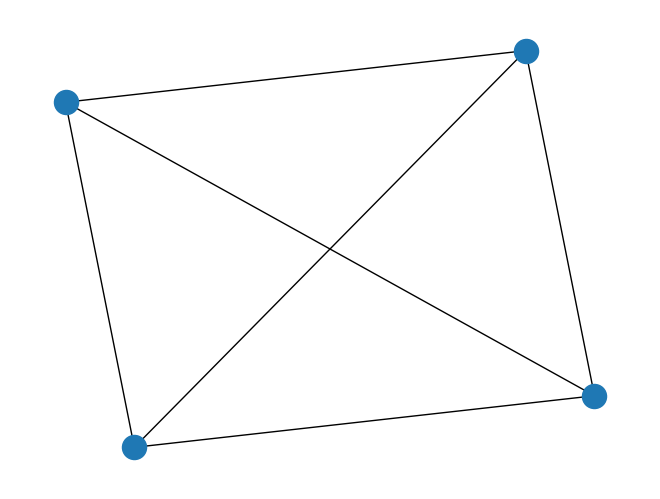

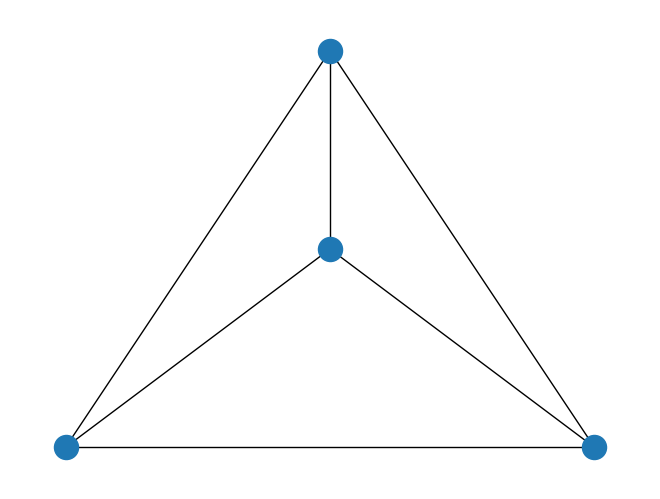

In [13]:
# complete graphs are cool
nx.draw_spring(nx.complete_graph(4))
plt.show()

nx.draw_planar(nx.complete_graph(4))
plt.show()


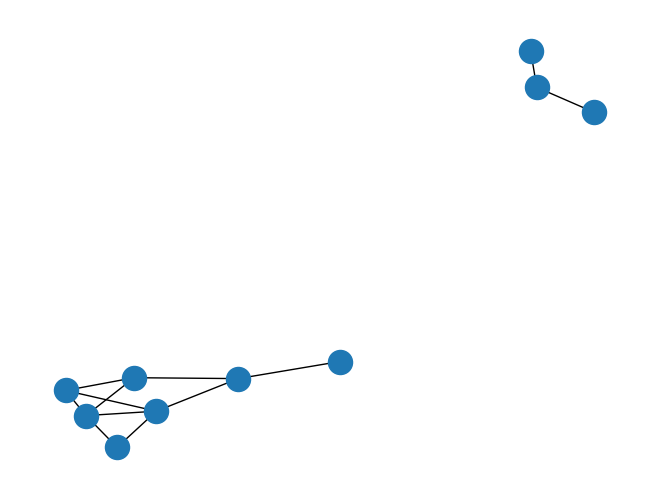

In [14]:
# _cracks knuckles_ let's make a random graph
G = nx.fast_gnp_random_graph(10, .2)
nx.draw(G)


In [15]:
# let's build a simple directed graph from scratch
G = nx.DiGraph()

# nodes named "1" and "2" are implicitly created by adding edges between nodes
# with those names
G.add_edge(1, 2)

# weight acts like a cost function, where higher values mean more cost
G.add_edge(2, 3, weight=0.5)

# we can pass in any python object, even function objects
G.add_edge(1, "four")
G.add_edge(2, print)
G.add_edge(3, 3)
G.add_edge('four', 11)
G.add_edge(31, 13)
G.add_edge(13, 24)


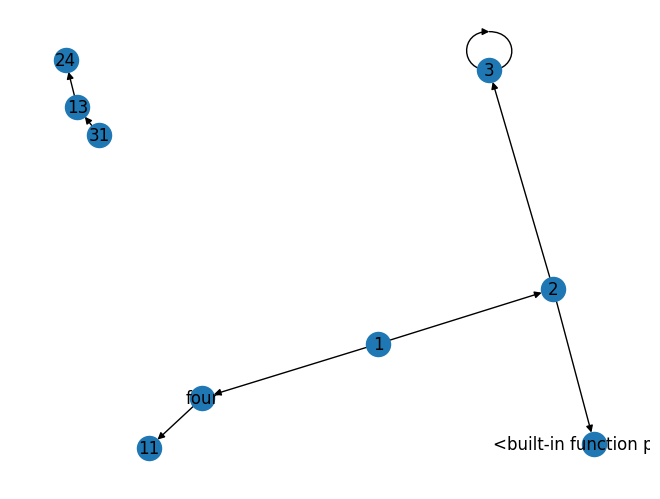

In [16]:
# draw the graph (with labels) a few different ways
nx.draw(G, with_labels=True)


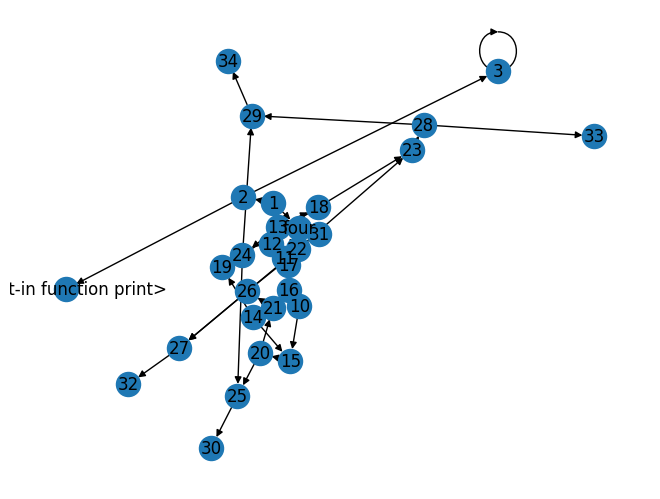

In [17]:
# copying and pasting code is for losers
G.add_edges_from([(n, n+1) for n in range(10, 30, 2)])
G.add_edges_from([(n, n+5) for n in range(10, 30)])
nx.draw(G, with_labels=True)


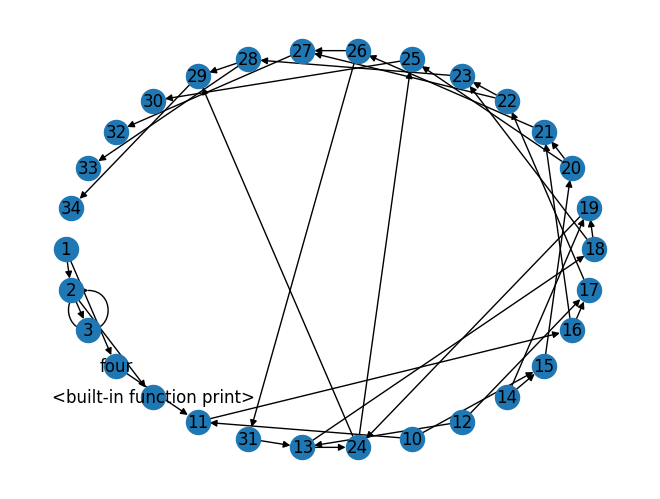

In [18]:
# try to draw it so edges don't cross
nx.draw_shell(G, with_labels=True)


In [24]:
closeness = nx.closeness_centrality(G)
max_closeness = max(closeness, key=lambda x: closeness[x])
print(f'the node with the highest closeness centrality is {max_closeness} '
      f'({closeness[max_closeness]})')

betweenness = nx.betweenness_centrality(G)
max_betweenness = max(betweenness, key=lambda x: betweenness[x])
print(f'the node with the highest betweenness centrality is {max_betweenness} '
      f'({betweenness[max_betweenness]})')


the node with the highest closeness centrality is 29 (0.16820857863751051)
the node with the highest betweenness centrality is 26 (0.10385878489326765)


In [109]:
paths_to_try = [
    ('four', 13),
    (1, print),
    (13, 31),
    (31, 25),
]
for p in paths_to_try:
    try:
        s = nx.shortest_path(G, p[0], p[1])
    except Exception:
        print(f'no path from {p[0]} to {p[1]}')
    else:
        print(f'shortest path from {p[0]} to {p[1]} is: {s}')
        
# edges divided by total possible edges
print(f'{nx.density(G)=}')


shortest path from four to 13 is: ['four', 11, 16, 21, 26, 31, 13]
shortest path from 1 to <built-in function print> is: [1, 2, <built-in function print>]
no path from 13 to 31
shortest path from 31 to 25 is: [31, 13, 24, 25]
nx.density(G)=0.04367816091954023


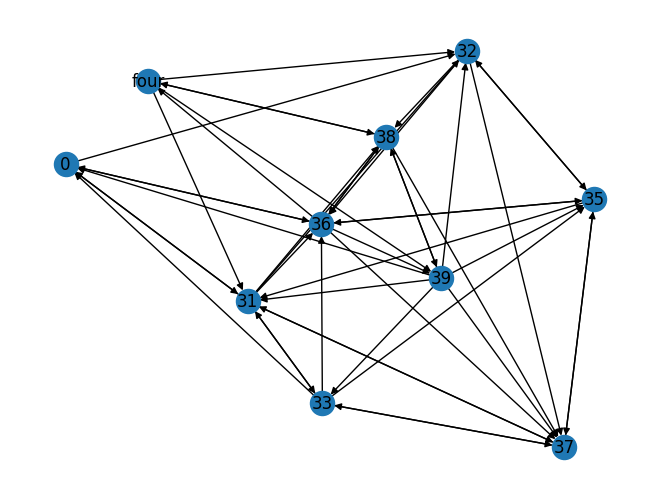

In [102]:
# make a new random graph
num_nodes = 10
G1 = nx.fast_gnp_random_graph(num_nodes, .5, directed=True)

# relabel the nodes to be distict from previous graphs
label_map = {}
for n in range(1, num_nodes):
    label_map[n] = 30+n
G1 = nx.relabel_nodes(G1, label_map)

# relabel one of the nodes as our junction
G1 = nx.relabel_nodes(G1, {34: 'four'})

nx.draw(G1, with_labels=True)


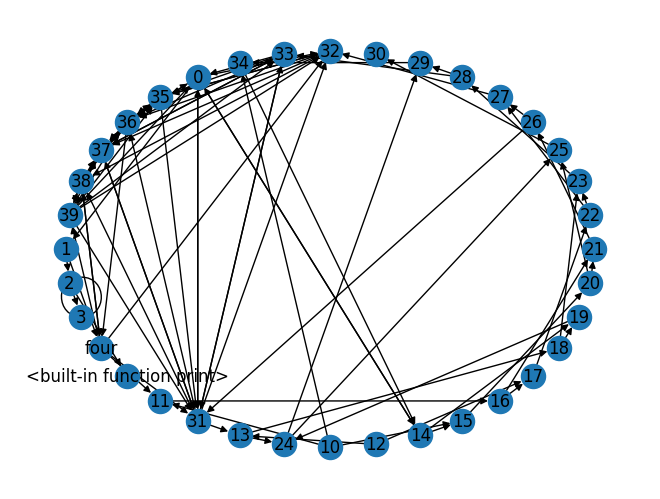

In [103]:


# set up additional connections across the nodes that belong to both graphs
G_connector = nx.DiGraph()
G_connector.add_edges_from([(34, 14), (14, 0), (0,14), (10, 34), (0, 1)])

# join all graphs, with like node names being considered the same node
G_joined = nx.compose_all([G, G1, G_connector])

nx.draw_shell(G_joined, with_labels=True)


In [110]:
closeness = nx.closeness_centrality(G_joined)
max_closeness = max(closeness, key=lambda x: closeness[x])
print(f'the node with the highest closeness centrality is {max_closeness} '
      f'({closeness[max_closeness]})')

betweenness = nx.betweenness_centrality(G_joined)
max_betweenness = max(betweenness, key=lambda x: betweenness[x])
print(f'the node with the highest betweenness centrality is {max_betweenness} '
      f'({betweenness[max_betweenness]})')

paths_to_try = [
    (0, 14),
    (26, 1),
    (35, 29),
]
for p in paths_to_try:
    try:
        s = nx.shortest_path(G_joined, p[0], p[1])
    except Exception:
        print(f'no path from {p[0]} to {p[1]}')
    else:
        print(f'shortest path from {p[0]} to {p[1]} is: {s}')

# edges divided by total possible edges
print(f'{nx.density(G_joined)=}')


the node with the highest closeness centrality is 31 (0.2955665024630542)
the node with the highest betweenness centrality is 31 (0.2816906762705082)
shortest path from 0 to 14 is: [0, 14]
shortest path from 26 to 1 is: [26, 31, 0, 1]
shortest path from 35 to 29 is: [35, 31, 13, 24, 29]
nx.density(G_joined)=0.07063492063492063
